Missing Values:
 Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
dtype: int64


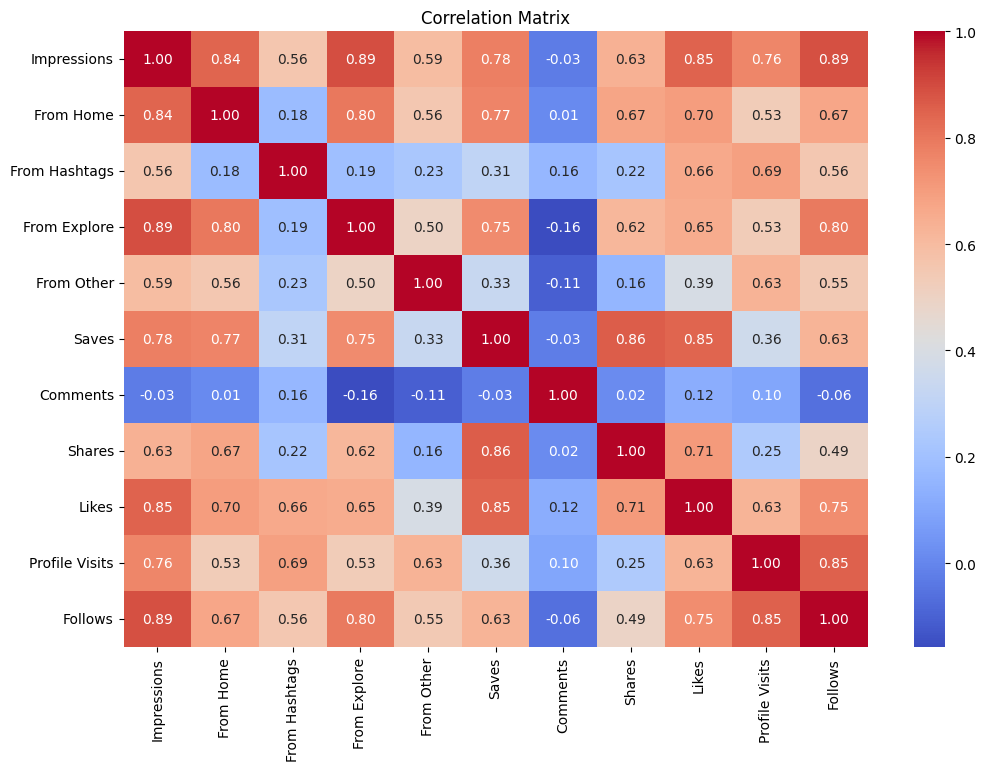


Top correlations with Impressions:
 Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64

R-squared Score: 0.9996

Feature Importance (Regression Coefficients):
 Shares            1.486255
From Other        1.047202
From Explore      1.013295
From Home         1.005954
From Hashtags     0.997740
Likes             0.346933
Follows           0.126429
Profile Visits   -0.025523
Saves            -0.553727
Comments         -1.948682
dtype: float64


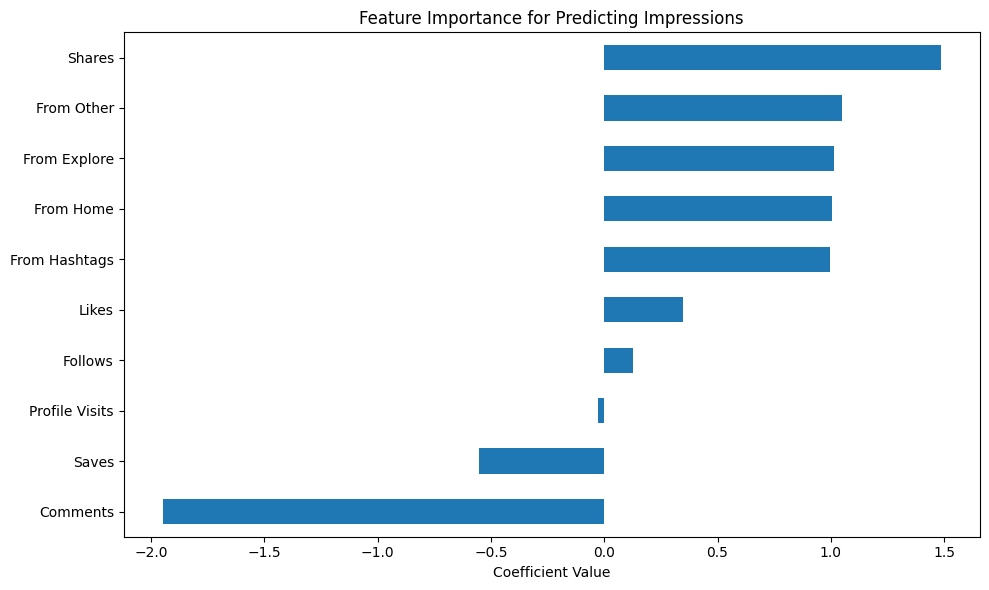

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv("Data.csv", encoding='ISO-8859-1')

# Drop non-numeric columns
numeric_df = df.drop(columns=["Caption", "Hashtags"])

# Check for missing values
print("Missing Values:\n", numeric_df.isnull().sum())

# Correlation matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Top correlations with Impressions
top_corr = correlation_matrix["Impressions"].sort_values(ascending=False)
print("\nTop correlations with Impressions:\n", top_corr)

# Prepare data for regression
X = numeric_df.drop(columns=["Impressions"])
y = numeric_df["Impressions"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared Score: {r2:.4f}")

# Feature importance (coefficients)
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance (Regression Coefficients):\n", coefficients)

# Optional: plot feature importances
coefficients.plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance for Predicting Impressions")
plt.xlabel("Coefficient Value")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
